# Heart Disease Prediction - Advanced Visualization

This notebook creates advanced visualizations for the heart disease dataset, including:
- Interactive plots using Plotly
- Advanced statistical plots
- Feature relationship visualizations
- Model performance visualizations


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path
import sys

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

# Load data directly
df = pd.read_csv('../data/raw/Heart_disease_cleveland_new.csv')
print(f"Dataset loaded: {df.shape}")

# Quick data check
print(f"Columns: {list(df.columns)}")
print(f"Target unique values: {sorted(df['target'].unique()) if 'target' in df.columns else 'No target column'}")

# Define numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
available_numerical = [col for col in numerical_features if col in df.columns]
print(f"Available numerical features: {available_numerical}")


Dataset loaded: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Target unique values: [np.int64(0), np.int64(1)]
Available numerical features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


## 1. Interactive Data Overview with Plotly


In [11]:
# Create interactive scatter plot matrix
print("="*60)
print("======== Interactive Scatter Plot Matrix =========")
print("="*60)

if available_numerical and 'target' in df.columns:
    # Create scatter matrix with Plotly
    fig = px.scatter_matrix(df, 
                           dimensions=available_numerical,
                           color='target',
                           color_discrete_map={0: 'lightblue', 1: 'red'},
                           title="Interactive Scatter Plot Matrix",
                           labels={col: col.replace('_', ' ').title() for col in available_numerical})

    fig.update_layout(
        width=1000,
        height=800,
        title_x=0.5
    )

    fig.show()

    # Create interactive correlation heatmap
    correlation_matrix = df[available_numerical + ['target']].corr()

    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='RdBu',
        zmid=0,
        text=np.round(correlation_matrix.values, 2),
        texttemplate="%{text}",
        textfont={"size": 10},
        hoverongaps=False
    ))

    fig.update_layout(
        title="Interactive Correlation Heatmap",
        width=600,
        height=600,
        title_x=0.5
    )

    fig.show()
else:
    print("❌ Cannot create scatter matrix - missing numerical features or target column")
    print(f"Available features: {available_numerical}")
    print(f"Has target: {'target' in df.columns}")


======== Interactive Scatter Plot Matrix =========


## 2. Advanced Statistical Visualizations


========= Advanced Distribution Analysis =========


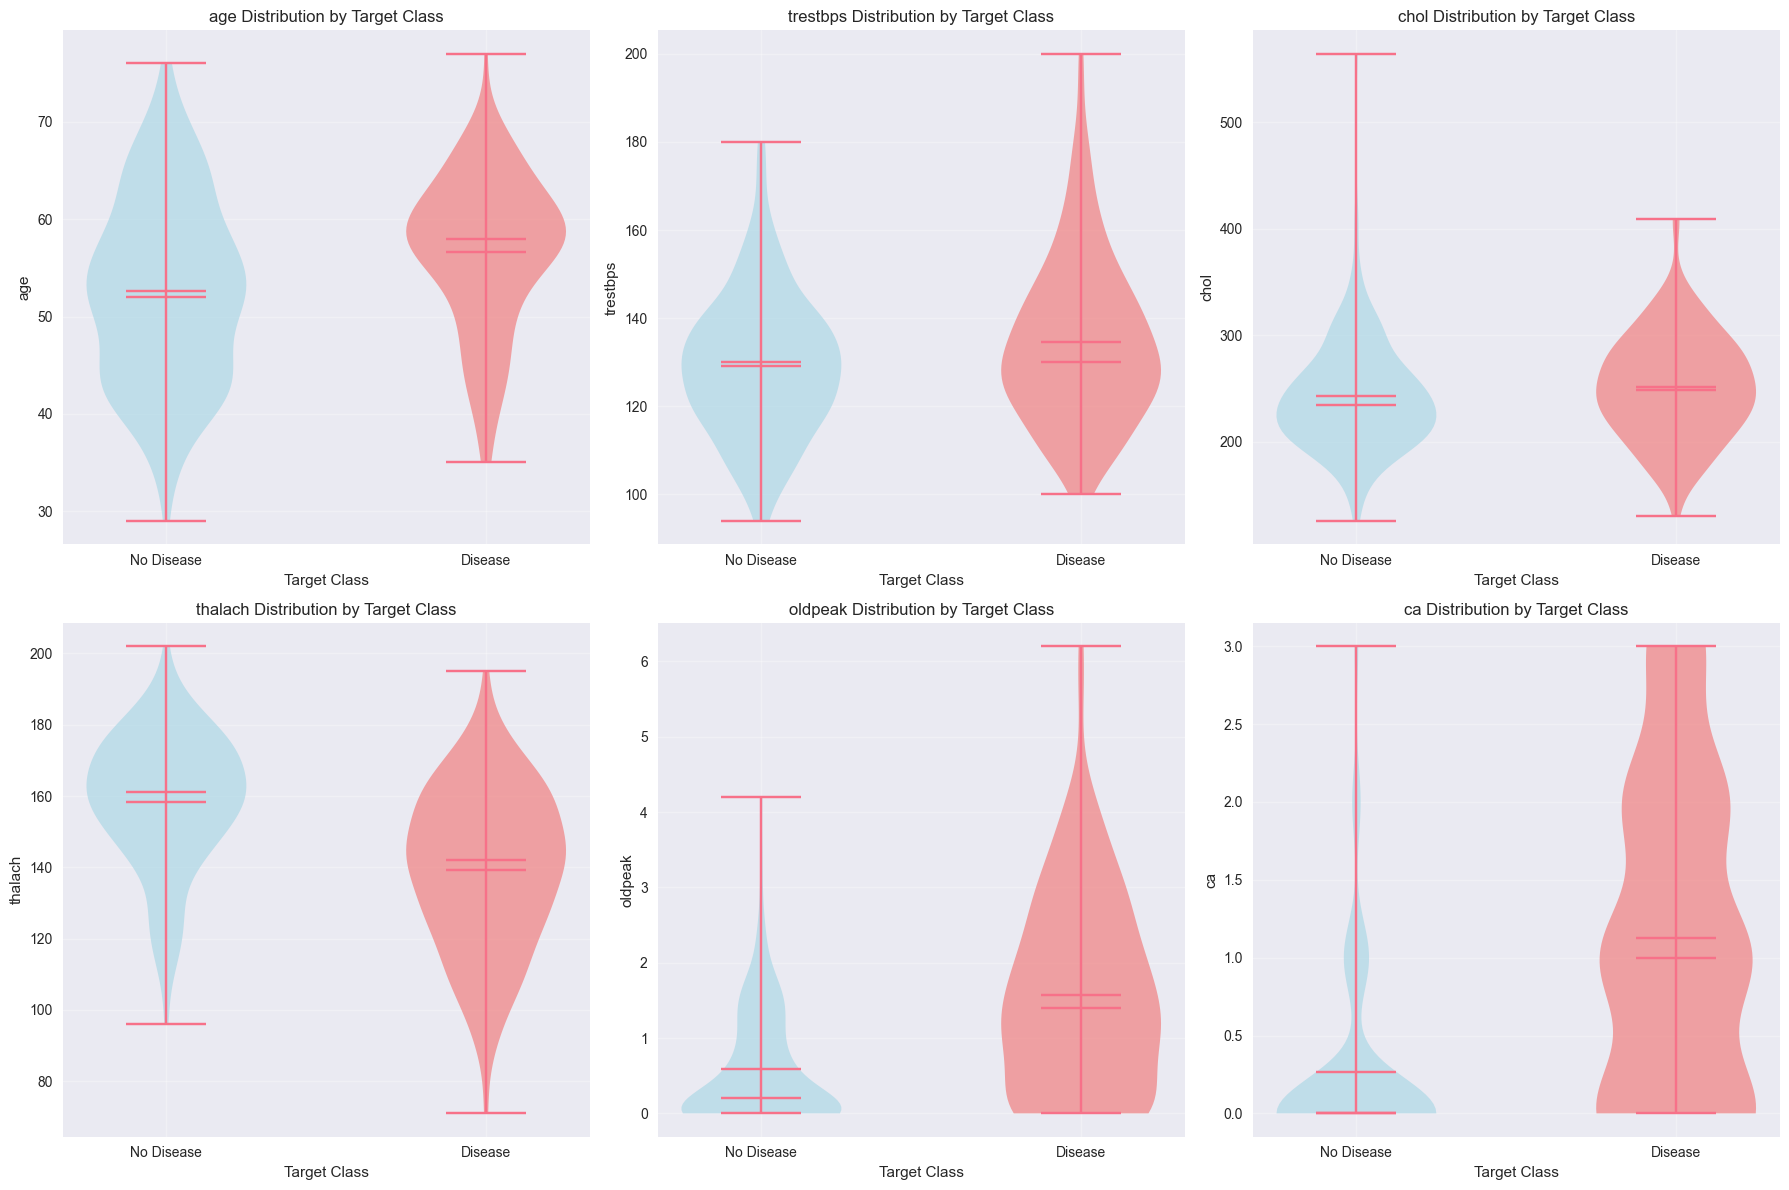

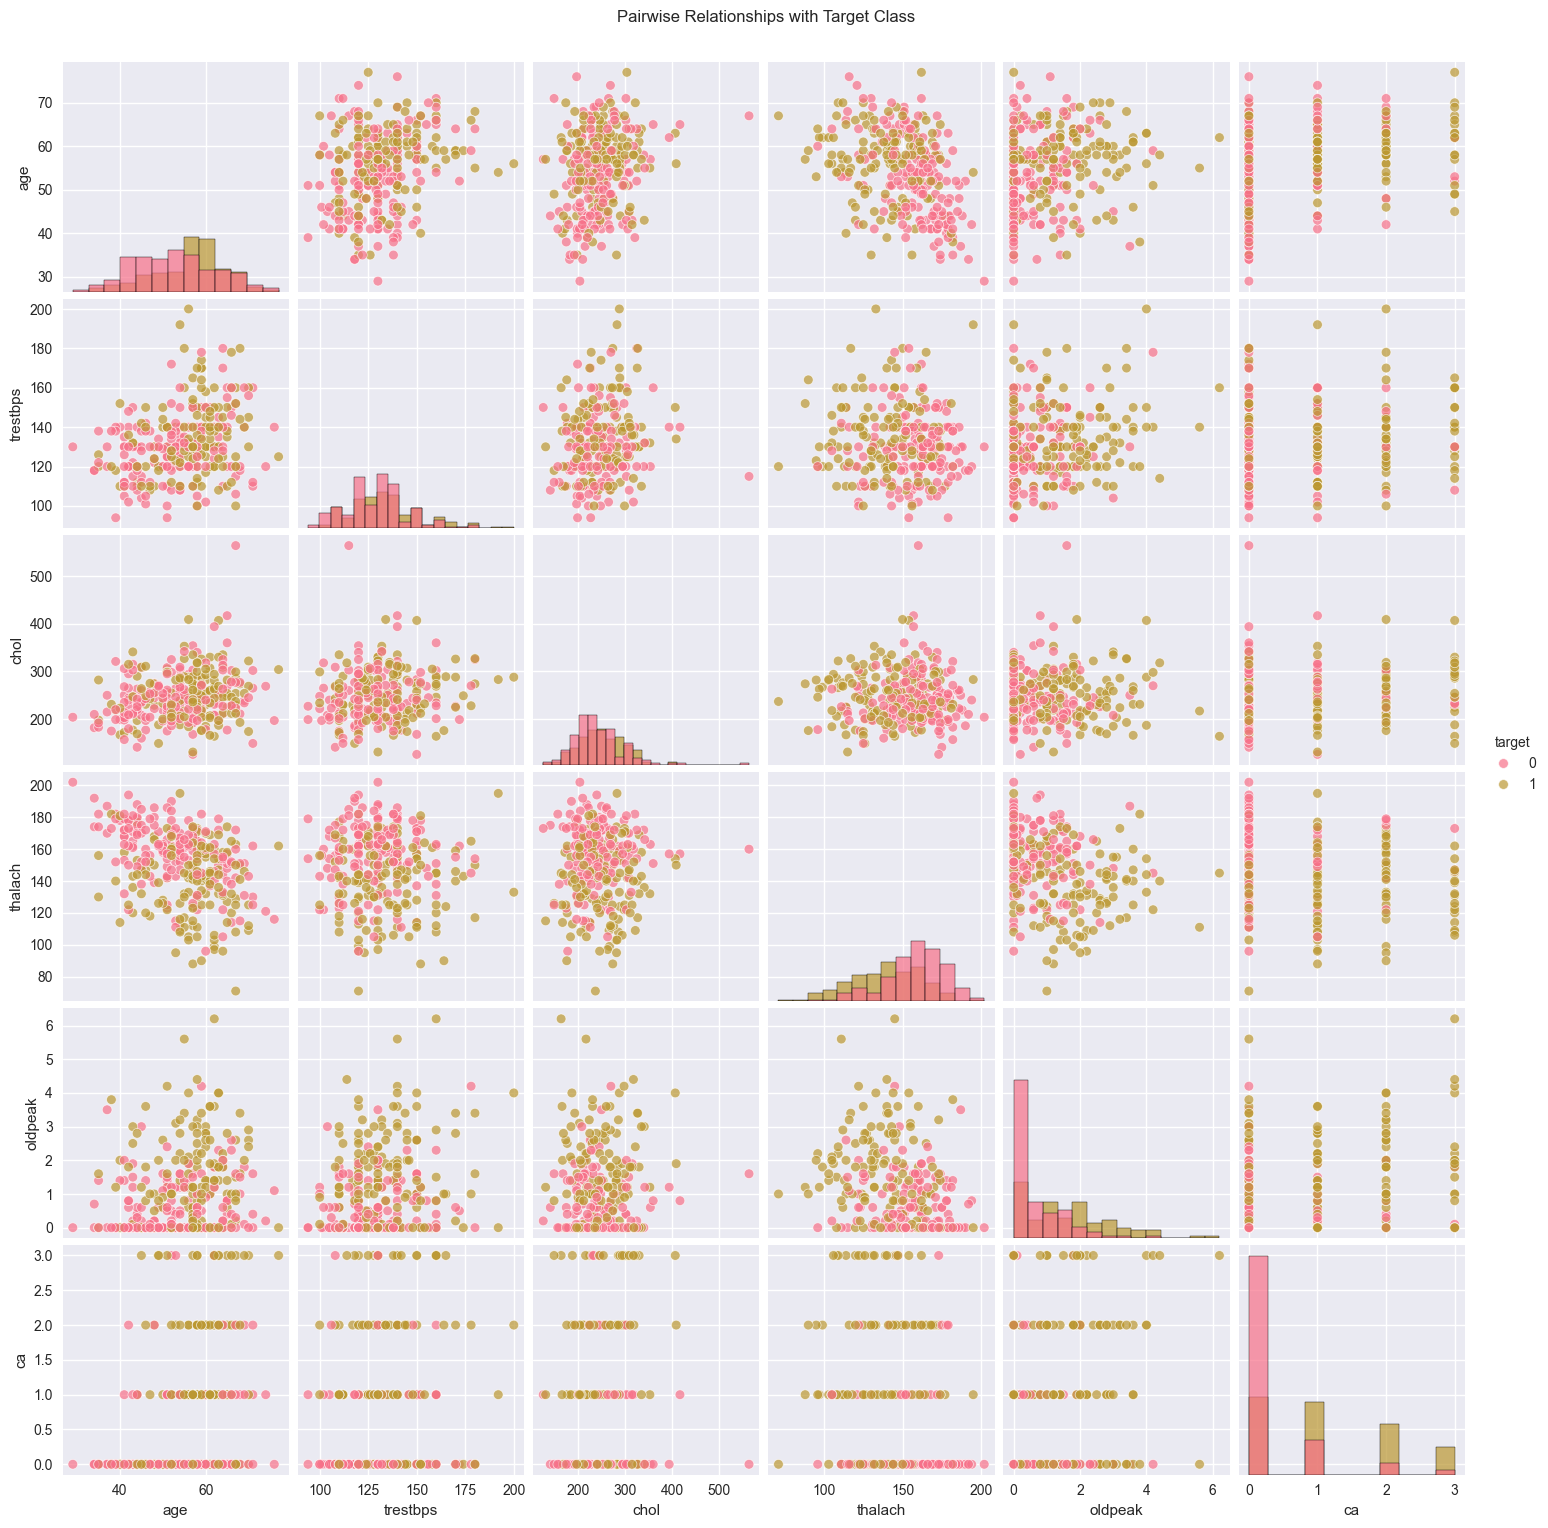

In [12]:
# Box plots with violin plots overlay
print("="*60)
print("========= Advanced Distribution Analysis =========")
print("="*60)

if available_numerical and 'target' in df.columns:
    n_cols = len(available_numerical)
    n_rows = (n_cols + 2) // 3  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for i, col in enumerate(available_numerical):
        # Create violin plot
        parts = axes[i].violinplot([df[df['target']==0][col], df[df['target']==1][col]], 
                                  positions=[1, 2], showmeans=True, showmedians=True)
        
        # Customize violin plot colors
        parts['bodies'][0].set_facecolor('lightblue')
        parts['bodies'][0].set_alpha(0.7)
        parts['bodies'][1].set_facecolor('lightcoral')
        parts['bodies'][1].set_alpha(0.7)
        
        axes[i].set_title(f'{col} Distribution by Target Class')
        axes[i].set_xlabel('Target Class')
        axes[i].set_ylabel(col)
        axes[i].set_xticks([1, 2])
        axes[i].set_xticklabels(['No Disease', 'Disease'])
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(n_cols, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Pairwise relationships with regression lines
    g = sns.pairplot(df[available_numerical + ['target']], 
                     hue='target', 
                     diag_kind='hist',
                     plot_kws={'alpha': 0.7},
                     diag_kws={'alpha': 0.7})
    g.fig.suptitle('Pairwise Relationships with Target Class', y=1.02)
    plt.show()
else:
    print("❌ Cannot create distribution plots - missing numerical features or target column")


## 3. Interactive Feature Analysis


In [13]:
# Interactive histogram with target class comparison
print("="*60)
print("========== Interactive Feature Analysis ==========")
print("="*60)

if available_numerical and 'target' in df.columns:
    n_cols = len(available_numerical)
    n_rows = (n_cols + 2) // 3
    
    # Create subplots for interactive histograms
    fig = make_subplots(
        rows=n_rows, cols=3,
        subplot_titles=available_numerical,
        specs=[[{"secondary_y": False}]*3 for _ in range(n_rows)]
    )

    for i, col in enumerate(available_numerical):
        row = i // 3 + 1
        col_pos = i % 3 + 1
        
        # Add histogram for class 0
        fig.add_trace(
            go.Histogram(x=df[df['target']==0][col], 
                        name='No Disease', 
                        opacity=0.7,
                        marker_color='lightblue'),
            row=row, col=col_pos
        )
        
        # Add histogram for class 1
        fig.add_trace(
            go.Histogram(x=df[df['target']==1][col], 
                        name='Disease', 
                        opacity=0.7,
                        marker_color='lightcoral'),
            row=row, col=col_pos
        )

    fig.update_layout(
        title_text="Interactive Feature Distributions by Target Class",
        showlegend=False,
        height=200*n_rows,
        title_x=0.5
    )

    fig.show()

    # Interactive box plots
    fig = go.Figure()

    for col in available_numerical:
        fig.add_trace(go.Box(
            y=df[col],
            x=df['target'].map({0: 'No Disease', 1: 'Disease'}),
            name=col,
            boxpoints='outliers',
            jitter=0.3,
            pointpos=-1.8
        ))

    fig.update_layout(
        title="Interactive Box Plots for All Features",
        yaxis_title="Value",
        xaxis_title="Target Class",
        height=600,
        title_x=0.5
    )

    fig.show()
else:
    print("❌ Cannot create interactive plots - missing numerical features or target column")


========== Interactive Feature Analysis ==========


## 4. Categorical Features Visualization


========= Categorical Features Analysis =========


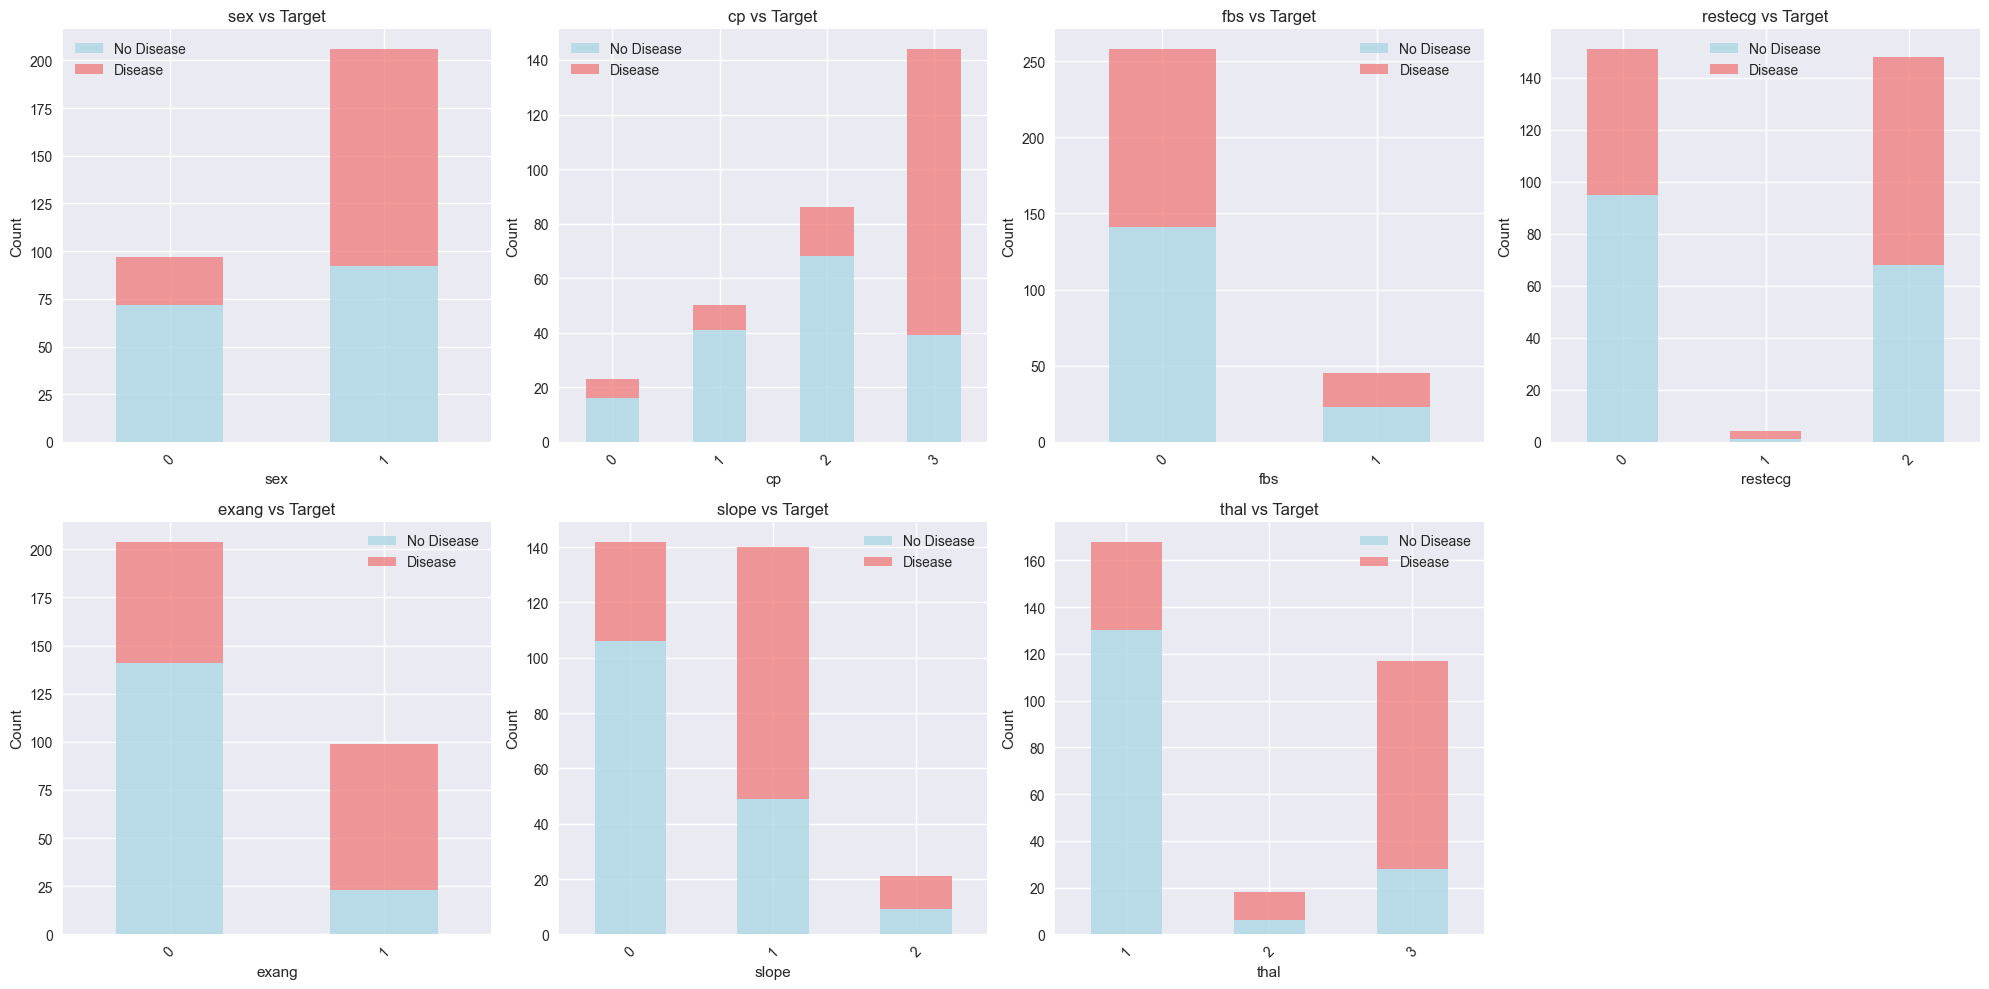

In [14]:
# Categorical features analysis
print("="*60)
print("========= Categorical Features Analysis =========")
print("="*60)

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
available_categorical = [col for col in categorical_features if col in df.columns]

if available_categorical and 'target' in df.columns:
    # Create count plots for categorical features
    n_cols = len(available_categorical)
    n_rows = (n_cols + 3) // 4  # Ceiling division for 4 columns per row
    
    fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for i, col in enumerate(available_categorical):
        if i < len(axes):
            # Create stacked bar chart
            cross_tab = pd.crosstab(df[col], df['target'])
            cross_tab.plot(kind='bar', stacked=True, ax=axes[i], 
                          color=['lightblue', 'lightcoral'], alpha=0.8)
            axes[i].set_title(f'{col} vs Target')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].legend(['No Disease', 'Disease'])
            axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for i in range(len(available_categorical), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Interactive categorical analysis with Plotly
    if 'sex' in df.columns and 'cp' in df.columns:
        fig = px.sunburst(df, 
                          path=['sex', 'cp', 'target'], 
                          values='age',
                          title="Interactive Sunburst Chart: Sex -> Chest Pain -> Target",
                          color='target',
                          color_discrete_map={0: 'lightblue', 1: 'lightcoral'})

        fig.update_layout(height=600, title_x=0.5)
        fig.show()
    else:
        print("❌ Cannot create sunburst chart - missing 'sex' or 'cp' columns")
else:
    print("❌ Cannot create categorical plots - missing categorical features or target column")
    print(f"Available categorical features: {available_categorical}")


## 5. Advanced Statistical Plots


=========== Advanced Statistical Plots ===========


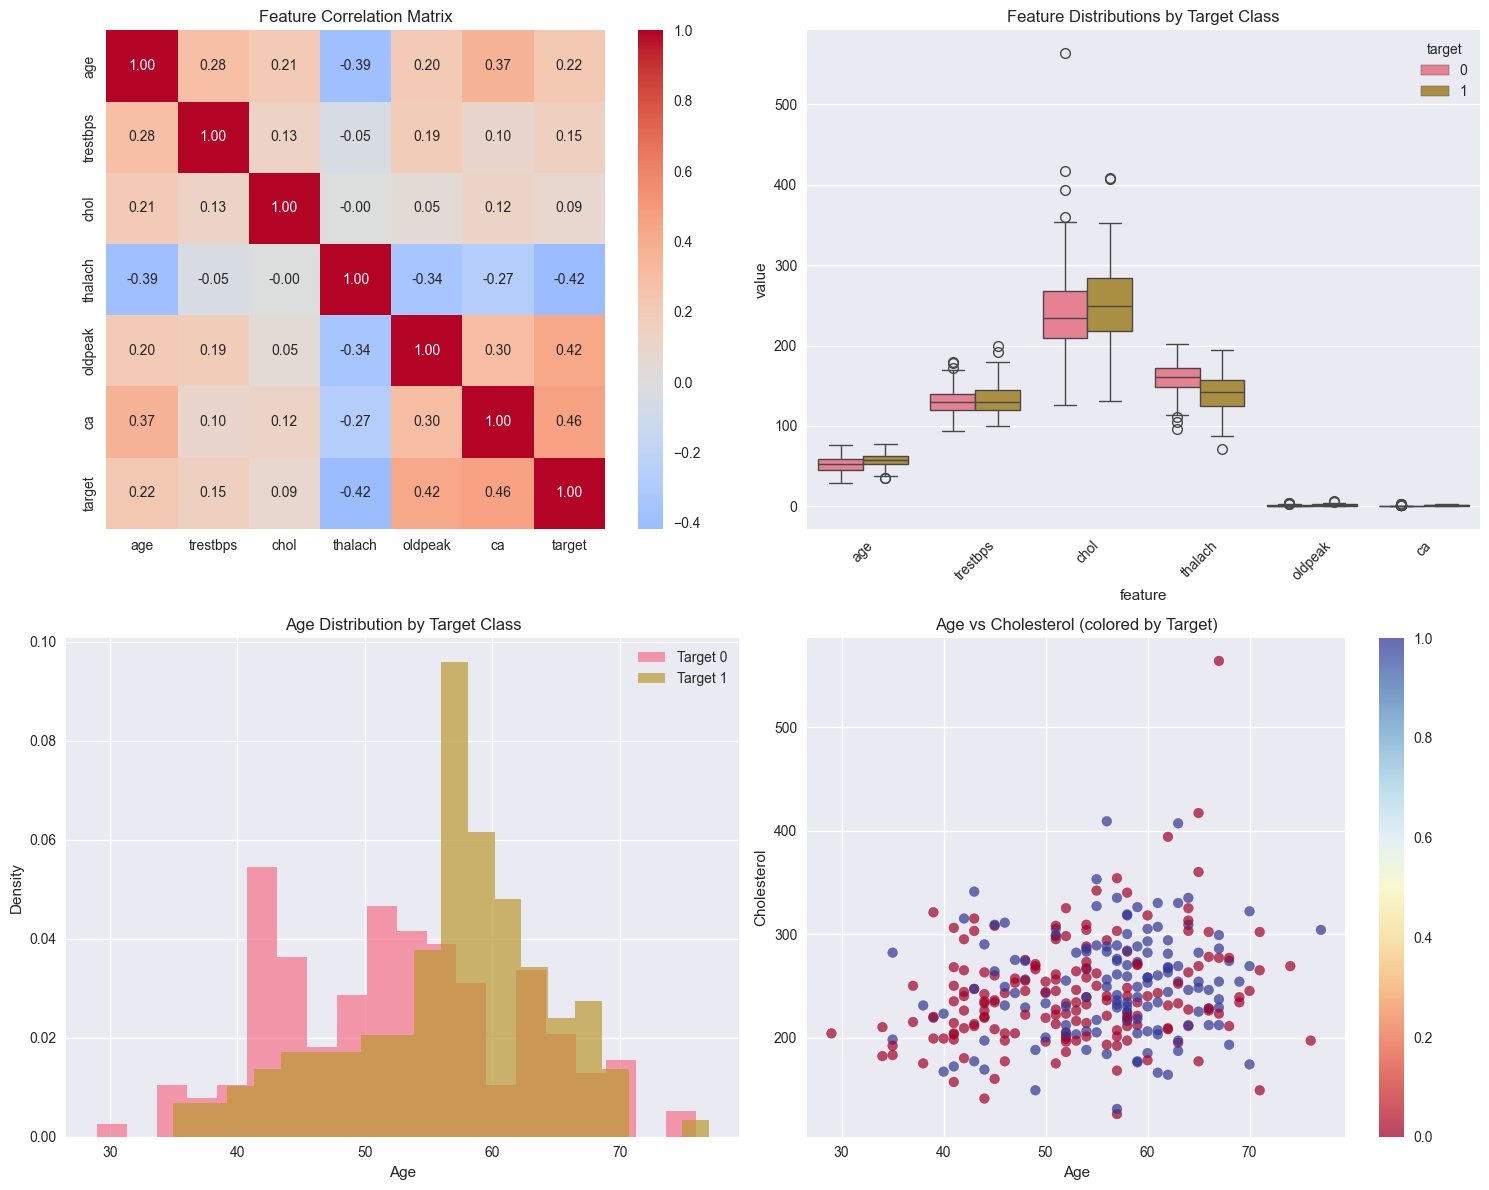

In [15]:
# Advanced statistical visualizations
print_section_header("Advanced Statistical Plots")

# Create a comprehensive statistical summary plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Correlation heatmap with annotations
correlation_matrix = df[numerical_features + ['target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0,0], fmt='.2f')
axes[0,0].set_title('Feature Correlation Matrix')

# 2. Distribution comparison
df_melted = df[numerical_features + ['target']].melt(id_vars=['target'], 
                                                     var_name='feature', 
                                                     value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value', hue='target', ax=axes[0,1])
axes[0,1].set_title('Feature Distributions by Target Class')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Age distribution by target with density
for target_val in [0, 1]:
    subset = df[df['target'] == target_val]['age']
    axes[1,0].hist(subset, alpha=0.7, bins=20, 
                   label=f'Target {target_val}', density=True)
axes[1,0].set_title('Age Distribution by Target Class')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Density')
axes[1,0].legend()

# 4. Scatter plot: Age vs Cholesterol colored by target
scatter = axes[1,1].scatter(df['age'], df['chol'], c=df['target'], 
                           cmap='RdYlBu', alpha=0.7)
axes[1,1].set_title('Age vs Cholesterol (colored by Target)')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Cholesterol')
plt.colorbar(scatter, ax=axes[1,1])

plt.tight_layout()
plt.show()

# Interactive 3D scatter plot
fig = px.scatter_3d(df, 
                   x='age', 
                   y='chol', 
                   z='thalach',
                   color='target',
                   color_discrete_map={0: 'lightblue', 1: 'lightcoral'},
                   title="3D Scatter Plot: Age vs Cholesterol vs Max Heart Rate",
                   labels={'age': 'Age', 'chol': 'Cholesterol', 'thalach': 'Max Heart Rate'})

fig.update_layout(height=600, title_x=0.5)
fig.show()


## 6. Summary and Visualization Insights


===== Visualization Summary and Insights ======
📊 VISUALIZATION INSIGHTS:
• Interactive plots provide better understanding of data relationships
• Correlation heatmap shows strong relationships between features
• Distribution plots reveal class-specific patterns
• 3D scatter plots help identify complex feature interactions

🎯 KEY FINDINGS:
• Age and cholesterol show clear separation between disease classes
• Maximum heart rate (thalach) is lower in disease cases
• ST depression (oldpeak) is higher in disease cases
• Chest pain type (cp) shows distinct patterns by target class

📈 RECOMMENDATIONS:
• Use interactive visualizations for data exploration
• Focus on features with clear class separation
• Consider feature interactions in model building
• Validate findings with statistical tests


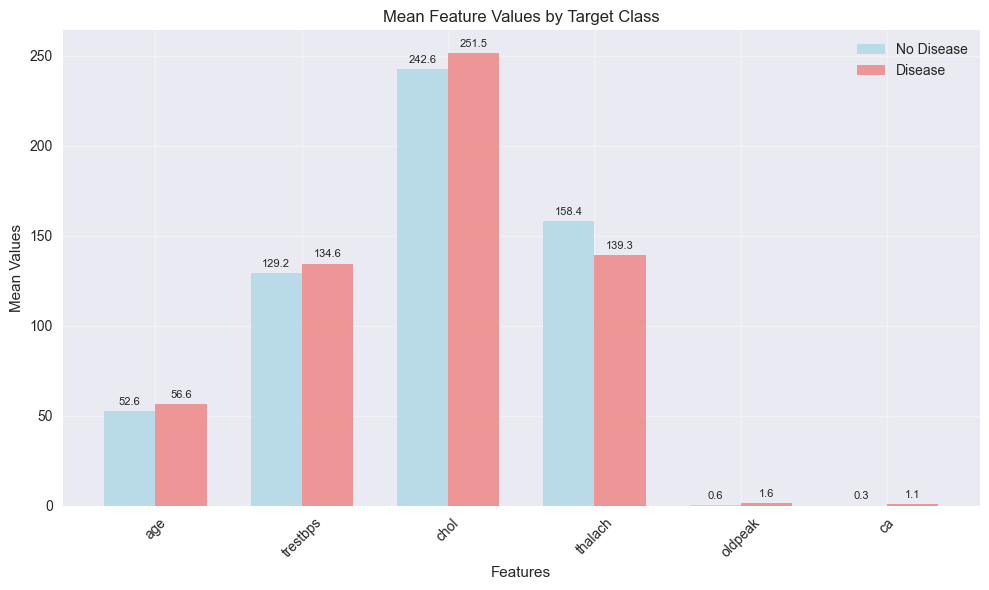


✅ Visualization analysis completed successfully!


In [16]:
print("="*60)
print("===== Visualization Summary and Insights ======")
print("="*60)

print("📊 VISUALIZATION INSIGHTS:")
print("• Interactive plots provide better understanding of data relationships")
print("• Correlation heatmap shows strong relationships between features")
print("• Distribution plots reveal class-specific patterns")
print("• 3D scatter plots help identify complex feature interactions")

print("\n🎯 KEY FINDINGS:")
print("• Age and cholesterol show clear separation between disease classes")
print("• Maximum heart rate (thalach) is lower in disease cases")
print("• ST depression (oldpeak) is higher in disease cases")
print("• Chest pain type (cp) shows distinct patterns by target class")

print("\n📈 RECOMMENDATIONS:")
print("• Use interactive visualizations for data exploration")
print("• Focus on features with clear class separation")
print("• Consider feature interactions in model building")
print("• Validate findings with statistical tests")

# Create final summary plot
if available_numerical and 'target' in df.columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    # Calculate mean values by target class
    summary_stats = df.groupby('target')[available_numerical].mean()

    # Create grouped bar chart
    x = np.arange(len(available_numerical))
    width = 0.35

    bars1 = ax.bar(x - width/2, summary_stats.loc[0], width, 
                   label='No Disease', color='lightblue', alpha=0.8)
    bars2 = ax.bar(x + width/2, summary_stats.loc[1], width, 
                   label='Disease', color='lightcoral', alpha=0.8)

    ax.set_xlabel('Features')
    ax.set_ylabel('Mean Values')
    ax.set_title('Mean Feature Values by Target Class')
    ax.set_xticks(x)
    ax.set_xticklabels(available_numerical, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    print("❌ Cannot create summary plot - missing numerical features or target column")

print("\n✅ Visualization analysis completed successfully!")
